Calculate the SNR for each region to (a) compare average levels across regions, and (b) see if decoding performance is correlated with SNR. 

Calculate SNR in two ways
- raw SNR 
- all vs fix SNR 

# Imports

In [2]:
import sys
#sys.path.append("/home/cgagne/Dropbox/python/PyMVPA-master")
#sys.path.append("/gpfs/home/cgagne/python/PyMVPA-master")
#sys.path.append("/gpfs/home/cgagne/python/PyMVPA-master/mvpa2/lib/python2.6/site-packages")
sys.path.append("/home/bishop/cgagne/MVPA_Analysis/CCV_Files/PyMVPA/mvpa2")
#import mdp # so PCAmapper can work

from mvpa2.tutorial_suite import *
import numpy as np
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/bishop/cgagne/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': 

In [3]:
subs = ['01','02','04','05','06','07','08','09',
        '10','11','12','13','14','15','16','17','18','19','20','21','22']
#rois_nums = [0,1,3]
subject = subs[1]

In [37]:
rois = ['Occipital_Lobe','Frontal_Lobe'] 

In [12]:
# #rois = ['Occipital_Lobe','Parietal_Lobe','Temporal_Lobe','Frontal_Lobe']       
# rois = ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R',
#        'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L',
#        'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R',
#        'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L',
#        'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R',
#         'Frontal_Sup_Medial_L',
#        'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R',
#        'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R']
# rois = ['AAL_'+roi for roi in rois]

# rois = rois+['AAL_Calcarine_L','AAL_Calcarine_R',
#              'AAL_Cuneus_L','AAL_Cuneus_R',
#             'AAL_Occipital_Inf_L','AAL_Occipital_Inf_R',
#             'AAL_Occipital_Mid_L','AAL_Occipital_Mid_R',
#             'AAL_Occipital_Sup_L','AAL_Occipital_Sup_R']
# print(rois)
# print(len(rois))
#rois = rois[0:4]
#print(rois) 
#rois = ['Occipital_Lobe','Parietal_Lobe','Temporal_Lobe','Frontal_Lobe']  
#roi_names_shorted = ['occipital','parietal','temporal','frontal']

['AAL_Precentral_L', 'AAL_Precentral_R', 'AAL_Frontal_Sup_L', 'AAL_Frontal_Sup_R', 'AAL_Frontal_Sup_Orb_L', 'AAL_Frontal_Sup_Orb_R', 'AAL_Frontal_Mid_L', 'AAL_Frontal_Mid_R', 'AAL_Frontal_Mid_Orb_L', 'AAL_Frontal_Mid_Orb_R', 'AAL_Frontal_Inf_Oper_L', 'AAL_Frontal_Inf_Oper_R', 'AAL_Frontal_Inf_Tri_L', 'AAL_Frontal_Inf_Tri_R', 'AAL_Frontal_Inf_Orb_L', 'AAL_Frontal_Inf_Orb_R', 'AAL_Frontal_Sup_Medial_L', 'AAL_Frontal_Sup_Medial_R', 'AAL_Frontal_Med_Orb_L', 'AAL_Frontal_Med_Orb_R', 'AAL_Insula_L', 'AAL_Insula_R', 'AAL_Cingulum_Ant_L', 'AAL_Cingulum_Ant_R', 'AAL_Calcarine_L', 'AAL_Calcarine_R', 'AAL_Cuneus_L', 'AAL_Cuneus_R', 'AAL_Occipital_Inf_L', 'AAL_Occipital_Inf_R', 'AAL_Occipital_Mid_L', 'AAL_Occipital_Mid_R', 'AAL_Occipital_Sup_L', 'AAL_Occipital_Sup_R']
34


In [13]:
# #rois = ['Occipital_Lobe','Parietal_Lobe','Temporal_Lobe','Frontal_Lobe']       
# rois = ['MD_IFGop_R','MD_IFGop_L','MD_Insula_R','MD_Insula_L',
#         'MD_MFG_R','MD_MFG_L','MD_ACC','MD_PrecG_R','MD_PrecG_L']

# rois = rois+['AAL_Calcarine_L','AAL_Calcarine_R',
#              'AAL_Cuneus_L','AAL_Cuneus_R',
#             'AAL_Occipital_Inf_L','AAL_Occipital_Inf_R',
#             'AAL_Occipital_Mid_L','AAL_Occipital_Mid_R',
#             'AAL_Occipital_Sup_L','AAL_Occipital_Sup_R']
# print(rois)
# print(len(rois))
# #rois = rois[0:4]
# #print(rois) 
# #rois = ['Occipital_Lobe','Parietal_Lobe','Temporal_Lobe','Frontal_Lobe']  
# #roi_names_shorted = ['occipital','parietal','temporal','frontal']

- load each subjects data within a single ROI
- calulate raw snr
- plot raw signal to look for weird shit
- detrend by run
- average per TR after stimulus onset
- SNR = time-points 4-8 minus time-points 1-4?
- Store this SNR per subjects 
- Plot average per ROI
- Get classification per ROI per subjects 
- Correlate and plot 

# Make MD ROIS


In [5]:
import nibabel as nib
from nilearn import datasets

In [24]:
mdnames = {}
mdnames['13350']='IFGop_R'
mdnames['12136']='IFGop_L'
mdnames['10922'] = 'Insula_R'
mdnames['9709'] = 'Insula_L'
mdnames['27913'] = 'MFG_R'
mdnames['25485'] = 'MFG_L'
mdnames['14563'] = 'ACC'
mdnames['16990'] = 'PrecG_R'
mdnames['15777'] = 'PrecG_L'

In [20]:
# all_md_regions = nib.load('../data_inhouse_fmri/data_rois/MDROI_sized.nii')
# data = all_md_regions.get_data();
# roi_nums = np.unique(data)
# for roi_num in roi_nums:
#     all_md_regions = nib.load('../data_inhouse_fmri/data_rois/MDROI_sized.nii')
#     data = all_md_regions.get_data();
#     data[data!=roi_num]=0.0
#     data[data==roi_num]=1.0
#     try:
#         savename = mdnames[str(roi_num)]
#     except:
#         savename='0'
#     all_md_regions.to_filename('../data_inhouse_fmri/data_rois/MD_'+savename+'_sized_0.nii.gz')

# Make AAL ROIs


In [6]:
#datasets.fetch_coords_dosenbach_2010()

In [5]:
dataset = datasets.fetch_atlas_aal()
atlas_filename = dataset.maps
atlas_img = nib.load(dataset.maps)
atlas_img_data = atlas_img.get_data()
atlas_img.to_filename('../data_inhouse_fmri/data_rois/AAL.nii.gz')

save out raw AAL (only do once)


In [6]:
# for roi,index in zip(dataset.labels,dataset.indices):
#     atlas_img = nib.load(dataset.maps)
#     atlas_img_data = atlas_img.get_data()
#     atlas_img_data[atlas_img_data!=int(index)]=0.0
#     atlas_img.to_filename('../data_inhouse_fmri/data_rois/AAL_'+roi+'.nii.gz')


overlay each in MRI and save back out


load each roi and change >0 numbers into 1


In [7]:
# for roi in rois:
#     img = nib.load('../data_inhouse_fmri/data_rois/'+roi+'_sized.nii.gz')
#     data = img.get_data()
#     data[data>0]=1.0
#     img.to_filename('../data_inhouse_fmri/data_rois/'+roi+'_sized_0.nii.gz')

# Make Outside-the-brain Mask


In [8]:
# img = nib.load('../data_inhouse_fmri/data_rois/Occipital_Lobe.nii.gz')
# data = img.get_data()
# print(data.shape)
# data[:,:,:]=0.0
# data[0:20,0:20,49:69]=1.0
# img.to_filename('../data_inhouse_fmri/data_rois/Outside_Brain_Square.nii.gz')

# Getting Raw Data for Each Subject

In [51]:
def get_data(subject,rois):
    
    basefolder='/home/bishop/cgagne/MVPA_Analysis/data_inhouse_fmri/'
    subjectfolder = basefolder+"/data_mri/fmri_"+subject+"_TRI/bold/"
    subjectbehfolder = basefolder+"/data_behavioral/fmri_"+subject+"_TRI/tribehav/"
    roifolder = basefolder+"/data_rois/"
    resultsfolder = basefolder+"/results/"
    stim='type'
    onset = '+0'
    attr = SampleAttributes(os.path.join(subjectbehfolder,'TR'+stim+'onsets'+onset+'.txt')) # order 2 has exact timings...
    out={}
    for roi in rois:
        print(roi)
        ds = fmri_dataset(os.path.join(subjectfolder,'wraf.nii.gz'),targets=attr.targets,chunks=attr.chunks,mask=os.path.join(roifolder,roi+'_sized_0.nii.gz')) # can add mask here. 
        
        out['ds_'+roi]=ds
    
    return(out)

In [52]:
ds_set = get_data(subject,rois)

Occipital_Lobe


IOError: [Errno 2] No such file or directory: '/home/bishop/cgagne/MVPA_Analysis/data_inhouse_fmri//data_rois/Occipital_Lobe_sized_0.nii.gz'

In [ ]:
ds_set.keys()


In [ ]:
def plot_raw(ds_set,subject,show=True):
    plt.figure(figsize=(8,3))
    for ds_name in ds_set.keys():
        ds = ds_set[ds_name]
        plt.plot(np.mean(ds.samples[:,:],axis=1),label=ds_name)
#     plt.plot(np.mean(ds_occipital.samples[:,:],axis=1),label='Occipital')
#     plt.plot(np.mean(ds_parietal.samples[:,:],axis=1),label='Parietal')
#     plt.plot(np.mean(ds_frontal.samples[:,:],axis=1),label='Frontal')
#     plt.plot(np.mean(ds_outside.samples[:,:],axis=1),label='Outside Brain')
    plt.legend()
    plt.xlabel('TR')
    plt.ylabel('Average ROI Signal Intensity')
    plt.tight_layout()
    plt.savefig('../Figures/SNR_Analysis/Raw_TS_'+subject+'3.png',dpi=300)

    if show==False:
        plt.clf()
        
plot_raw(ds_set,subject,show=True)

# Get Outside-Brain Data

In [ ]:
ds_outside = get_data(subject,['Outside_Brain_Square'])


In [ ]:
ds_outside = ds_outside['ds_Outside_Brain_Square']
#ds_outside.keys()

# Calculating Raw SNR

In [ ]:
def calc_snr_raw(ds_set,ds_outside):
    '''the SNR here is spatial and temporal mean signal within each run / mean noise per run
    '''
    snr = np.array([])
    for ds_name in ds_set.keys():
        ds = ds_set[ds_name]
        snr_per_run = np.array([])
        for run in np.unique(ds.sa.chunks):
            
            snr_within_run = np.mean(ds.samples[ds.sa.chunks==run,:])/np.mean(ds_outside[ds.sa.chunks==run,:])
            snr_per_run = np.append(snr_per_run,snr_within_run)
        snr = np.append(snr,snr_per_run.mean())
            
    return(snr)


In [ ]:
snr_raw = calc_snr_raw(ds_set,ds_outside)
print(snr_raw)

# Detrend

In [ ]:
def detrend(ds_set):
    detrender = PolyDetrendMapper(polyord=1,chunks_attr='chunks')
    for ds_name in ds_set.keys():
        ds=ds_set[ds_name]
        ds_set[ds_name] = ds.get_mapped(detrender)
    return(ds_set)

In [ ]:
ds_set= detrend(ds_set)

In [ ]:
def plot_detrended(ds_set,subject,show=True):
    plt.figure(figsize=(8,3))
    for ds_name in ds_set.keys():
        ds = ds_set[ds_name]
        plt.plot(np.mean(ds.samples[:,:],axis=1),label=ds_name,alpha=0.5)
#     plt.plot(np.mean(ds_parietal.samples[:,:],axis=1),label='Parietal',alpha=0.5)
#     plt.plot(np.mean(ds_frontal.samples[:,:],axis=1),label='Frontal',alpha=0.5)
#     plt.plot(np.mean(ds_outside.samples[:,:],axis=1),label='Outside Brain',alpha=0.5)
    plt.legend()
    plt.xlabel('TR')
    plt.ylabel('Average ROI Signal Intensity \n De-trended by Run')
    plt.tight_layout()
    plt.savefig('../Figures/SNR_Analysis/Detrended_TS_'+subject+'3.png',dpi=300)

    if show==False:
        plt.clf()
        

plot_detrended(ds_set,subject,show=True)

# Calculating HRF 

In [ ]:
def calc_hrf(ds):
    std_per_TR = np.array([])
    response_per_TR = np.array([])
    for TR_after_onset in np.arange(8):
        TR_selector = np.where(ds.sa.targets!='0')[0]+TR_after_onset
        response_per_TR= np.append(response_per_TR,ds.samples[TR_selector,:].mean())
        std_per_TR= np.append(std_per_TR,ds.samples[TR_selector,:].std())
        
    return(response_per_TR,std_per_TR)

In [ ]:

def plot_hrfs(ds_set,subject,show=True):
    
    num_trs = 8
    
    fig,axes = plt.subplots(int(np.round(len(ds_set)/5.0)),
                            int(5),figsize=(18,18),sharey=True)
    axes = axes.flatten()
    for di,ds_name in enumerate(ds_set.keys()):
        ds = ds_set[ds_name] 
        (response_per_TR,std_per_TR)=calc_hrf(ds)
        n = ds.samples.shape[1]
        axes[di].errorbar(np.arange(num_trs),response_per_TR,yerr=std_per_TR/np.sqrt(n))
        axes[di].set_title(ds_name)
        axes[di].set_ylabel('Average Signal \n (demeaned within run)')
        axes[di].set_xlabel('TR (2 sec)')

    plt.tight_layout()
    
    plt.savefig('../Figures/SNR_Analysis/HRF_Plots_'+subject+'3.png',dpi=300)
    
    if show==False:
        plt.close() # for plotting in a loop # 
    

In [ ]:
plot_hrfs(ds_set,subject)

# Calculating SNR (All v Fix) for Each subject

In [ ]:
def calc_snr_all_v_fix(ds):
    '''the SNR here is a two-sample t-test: 
        average Signal - average Noise / pooled std()
        Signal = TRs 3,4 averaged across all 8 stimulus types
        Noise = all other time points
    '''
    signal_selector = np.where(ds.sa.targets!='0')[0]+3
    signal_selector = np.append(signal_selector,np.where(ds.sa.targets!='0')[0]+4)
    #signal_selector = np.append(signal_selector,np.where(ds.sa.targets!='0')[0]+5)

    noise_selector = np.array([i for i in np.arange(len(ds.sa.targets)) if i not in signal_selector])

    signal = ds.samples[signal_selector,:]
    noise = ds.samples[noise_selector,:]

    Sm = np.nanmean(signal,axis=0) # temporal average
    Nm = np.nanmean(noise,axis=0) # temporal average
    std = np.nanstd(ds.samples,axis=0) # temporal std

    t_map = (Sm-Nm)/np.sqrt(std**2*(1.0/len(signal_selector)+1.0/len(noise_selector)))

    SNR = np.nanmean(t_map)
    out={}
    out['SNR']=SNR
    out['t_map']=t_map
    out['Sm']=Sm
    out['Nm']=Nm
    out['std']=std
    return(out)


In [ ]:
ds = ds_set['ds_'+rois[0]]
out = calc_snr_all_v_fix(ds)


In [ ]:
out


# Repeating for all Subjects
- make sure iteration on dictionary is the same for each loop **

In [ ]:
#name = ds_name.split('_')[1]


In [ ]:
#subs

In [ ]:
df_subs = pd.DataFrame() # set up data frame
for s,subject in enumerate(subs):
    print(subject)
    # store name
    df_subs.loc[s,'subject']=subject
        
    # get data
    ds_set = get_data(subject,rois)

    # plot raw 
    plot_raw(ds_set,subject,show=False)
    
    ds_outside = get_data(subject,['Outside_Brain_Square'])
    ds_outside = ds_outside['ds_Outside_Brain_Square']
    
    # raw snr
    snr_raw = calc_snr_raw(ds_set,ds_outside)
    for di,ds_name in enumerate(ds_set.keys()):        
        df_subs.loc[s,'raw_snr_'+ds_name.split('_')[1]]=snr_raw[di]
        np.save('../data_inhouse_fmri/data_derived_for_snr/raw_snr_'+ds_name+'_'+subject+'.csv',snr_raw[di])
                           
    # detrend
    ds_set = detrend(ds_set)
    
    # plot detrended
    plot_detrended(ds_set,subject,show=False)
        
    # plot hrf's
    plot_hrfs(ds_set,subject,show=False)
                       
    # snr: all v fix   
    for di,ds_name in enumerate(ds_set.keys()): 
        ds = ds_set[ds_name]
        out = calc_snr_all_v_fix(ds)
        name = ds_name
        df_subs.loc[s,'all_v_fix_snr_'+name]=out['SNR']
        t_map = out['t_map']
        Sm = out['Sm']
        Nm = out['Nm']
        std = out['std']
        np.save('../data_inhouse_fmri/data_derived_for_snr/t_map_'+name+'_'+subject+'.csv',t_map)
        np.save('../data_inhouse_fmri/data_derived_for_snr/Sm_'+name+'_'+subject+'.csv',Sm)
        np.save('../data_inhouse_fmri/data_derived_for_snr/Nm_'+name+'_'+subject+'.csv',Nm)
        np.save('../data_inhouse_fmri/data_derived_for_snr/Std_'+name+'_'+subject+'.csv',std)
    

    

In [102]:
df_subs.columns

Index([u'subject', u'raw_snr_AAL', u'raw_snr_MD',
       u'all_v_fix_snr_ds_AAL_Cuneus_R',
       u'all_v_fix_snr_ds_AAL_Occipital_Sup_R',
       u'all_v_fix_snr_ds_AAL_Occipital_Mid_R', u'all_v_fix_snr_ds_MD_IFGop_R',
       u'all_v_fix_snr_ds_AAL_Calcarine_L',
       u'all_v_fix_snr_ds_AAL_Occipital_Inf_L',
       u'all_v_fix_snr_ds_MD_Insula_R', u'all_v_fix_snr_ds_MD_MFG_L',
       u'all_v_fix_snr_ds_MD_PrecG_L', u'all_v_fix_snr_ds_MD_MFG_R',
       u'all_v_fix_snr_ds_AAL_Occipital_Sup_L',
       u'all_v_fix_snr_ds_AAL_Occipital_Inf_R',
       u'all_v_fix_snr_ds_MD_Insula_L', u'all_v_fix_snr_ds_AAL_Calcarine_R',
       u'all_v_fix_snr_ds_AAL_Cuneus_L', u'all_v_fix_snr_ds_MD_IFGop_L',
       u'all_v_fix_snr_ds_MD_ACC', u'all_v_fix_snr_ds_AAL_Occipital_Mid_L',
       u'all_v_fix_snr_ds_MD_PrecG_R'],
      dtype='object')

In [ ]:

#df_subs.to_csv('../data_inhouse_fmri/data_derived_for_snr/df_sub4.csv')


# Read Back in 

In [ ]:
#df_subs= pd.read_csv('../data_inhouse_fmri/data_derived_for_snr/df_sub2.csv',index_col=0)

In [ ]:
#df_subs.head()

In [22]:
#df_subs.columns

# Re-Create DB

In [38]:
rois

['Occipital_Lobe', 'Frontal_Lobe']

In [49]:
df_subs = pd.DataFrame() # set up data frame
df_subs_r = pd.DataFrame() # set up data frame
for s,subject in enumerate(subs):
    
    df_subs.loc[s,'subject']=subject
    df_subs_r.loc[s,'subject']=subject
    for di,ds_name in enumerate(rois):   
        ds_name = 'ds_'+ds_name
        if ds_name=='ds_Occipital_Lobe':
            ds_name='01'
        if ds_name=='ds_Frontal_Lobe':
            ds_name='03'
        raw_snr = np.load('../data_inhouse_fmri/data_derived_for_snr/raw_snr_'+ds_name+'_'+subject+'.csv.npy')
        df_subs_r.loc[s,'raw_snr_'+ds_name]=raw_snr
        
    for di,ds_name in enumerate(rois): 
        ds_name = 'ds_'+ds_name
        tmap = np.load('../data_inhouse_fmri/data_derived_for_snr/t_map_'+ds_name+'_'+subject+'.csv.npy')
        df_subs.loc[s,'all_v_fix_snr_'+ds_name]=np.nanmean(tmap)

#print(df_subs.head())
#print(df_subs_r.head())

IOError: [Errno 2] No such file or directory: '../data_inhouse_fmri/data_derived_for_snr/raw_snr_01_13.csv.npy'

In [45]:
ds_name=='ds_Occiptal Lobe'

False

# Melt DBs

In [24]:
#df_subs['raw_']

In [25]:

df_all_melted = pd.melt(df_subs,id_vars=['subject'])

df_all_melted.columns =['subject','region','all v fix SNR']
for i in range(len(df_all_melted)):
    name = df_all_melted.loc[i,'region']
    name = name.replace('all_v_fix_snr_ds_AAL_','')
    name = name.replace('all_v_fix_snr_ds_MD_','')
    df_all_melted.loc[i,'region']=name
df_all_melted = df_all_melted.sort_values(by='region')
df_all_melted.head()


df_raw_melted = pd.melt(df_subs_r,id_vars=['subject'])

df_raw_melted.columns =['subject','region','raw SNR']
for i in range(len(df_raw_melted)):
    name = df_raw_melted.loc[i,'region']
    name = name.replace('raw_snr_ds_AAL_','')
    name = name.replace('raw_snr_ds_MD_','')
    df_raw_melted.loc[i,'region']=name
df_raw_melted = df_raw_melted.sort_values(by='region')
df_raw_melted.head()


,subject,region,raw SNR


# Bar Plot SNR

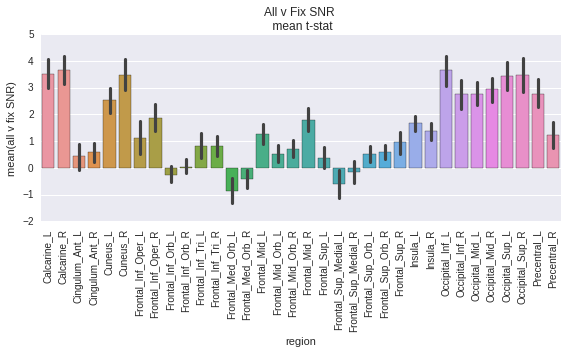

In [26]:
fig,axes = plt.subplots(1,1,figsize=(8,5))

#sns.stripplot(x='region',y='all v fix SNR',data=df_raw_melted,ax=axes)
sns.barplot(x='region',y='all v fix SNR',data=df_all_melted,ax=axes)

#axes[0].set_title('Raw SNR')
axes.set_title('All v Fix SNR \n mean t-stat')
#plt.savefig('../Figures/SNR_Analysis/Group_all_v_fix_SNR.png',dpi=300)
plt.xticks(rotation='vertical')
plt.tight_layout()
#plt.savefig('../Figures/SNR_Analysis/Group_Bar_SNR_4.png',dpi=300)

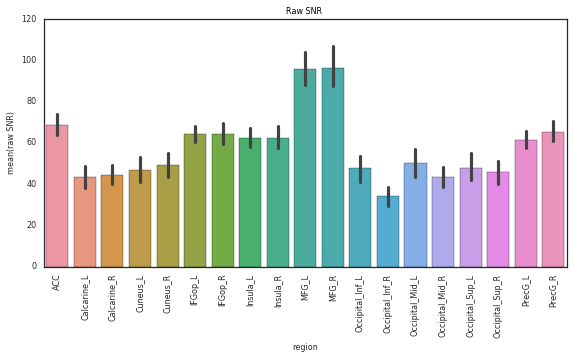

In [125]:
fig,axes = plt.subplots(1,1,figsize=(8,5))

#sns.stripplot(x='region',y='all v fix SNR',data=df_raw_melted,ax=axes)
sns.barplot(x='region',y='raw SNR',data=df_raw_melted,ax=axes)

#axes[0].set_title('Raw SNR')
axes.set_title('Raw SNR ')
#plt.savefig('../Figures/SNR_Analysis/Group_all_v_fix_SNR.png',dpi=300)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('../Figures/SNR_Analysis/Group_Bar_raw_SNR_4.png',dpi=300)

# Supplemental Paper Figure

In [204]:
# average across frontal and occipital? 

In [27]:
regions_v = ['Calcarine_L','Calcarine_R','Cuneus_L','Cuneus_R',
             'Occipital_Inf_L','Occipital_Inf_R','Occipital_Mid_L','Occipital_Mid_R',
            'Occipital_Sup_L','Occipital_Sup_R']

regions_f = ['ACC','IFGop_L','IFGop_R','Insula_L','Insula_R','MFG_L','MFG_R','PrecG_L','PrecG_R']

regions_f = ['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R',
       'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L',
       'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R',
       'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L',
       'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R',
        'Frontal_Sup_Medial_L',
       'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R',
       'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R']


dftmp=df_raw_melted.copy()
snrtype = 'raw SNR'
newrois = ['Visual Cortex','Frontal Cortex']
regions_news = [regions_v,regions_f]
for (regions_new,newroi) in zip(regions_news,newrois):
    for sub in dftmp.subject.unique():
        means = np.array([])
        for region in regions_new:
            means = np.append(means,np.nanmean(
                    dftmp.loc[(dftmp.region==region)&(dftmp.subject==sub)
                              ,snrtype].as_matrix()))
        dftmp.loc[len(dftmp)+1,['subject','region',snrtype]]=[sub,newroi,np.mean(means)]
        #dftmp2.loc[(dftmp2.subject==sub)&(dftmp2.region==newroi),snrtype]=np.mean(means)
df_raw_melted=dftmp.copy()
        
dftmp=df_all_melted.copy()
snrtype = 'all v fix SNR'
newrois = ['Visual Cortex','Frontal Cortex']
regions_news = [regions_v,regions_f]
for (regions_new,newroi) in zip(regions_news,newrois):
    for sub in dftmp.subject.unique():
        means = np.array([])
        for region in regions_new:
            means = np.append(means,np.nanmean(
                    dftmp.loc[(dftmp.region==region)&(dftmp.subject==sub)
                              ,snrtype].as_matrix()))
        dftmp.loc[len(dftmp)+1,['subject','region',snrtype]]=[sub,newroi,np.mean(means)]
        #dftmp2.loc[(dftmp2.subject==sub)&(dftmp2.region==newroi),snrtype]=np.mean(means)
df_all_melted=dftmp.copy()

    

In [28]:
print(df_raw_melted.region.unique())
print(df_all_melted.region.unique())

[]
['Calcarine_L' 'Calcarine_R' 'Cingulum_Ant_L' 'Cingulum_Ant_R' 'Cuneus_L'
 'Cuneus_R' 'Frontal_Inf_Oper_L' 'Frontal_Inf_Oper_R' 'Frontal_Inf_Orb_L'
 'Frontal_Inf_Orb_R' 'Frontal_Inf_Tri_L' 'Frontal_Inf_Tri_R'
 'Frontal_Med_Orb_L' 'Frontal_Med_Orb_R' 'Frontal_Mid_L'
 'Frontal_Mid_Orb_L' 'Frontal_Mid_Orb_R' 'Frontal_Mid_R' 'Frontal_Sup_L'
 'Frontal_Sup_Medial_L' 'Frontal_Sup_Medial_R' 'Frontal_Sup_Orb_L'
 'Frontal_Sup_Orb_R' 'Frontal_Sup_R' 'Insula_L' 'Insula_R'
 'Occipital_Inf_L' 'Occipital_Inf_R' 'Occipital_Mid_L' 'Occipital_Mid_R'
 'Occipital_Sup_L' 'Occipital_Sup_R' 'Precentral_L' 'Precentral_R'
 'Visual Cortex' 'Frontal Cortex']


In [32]:
df_all_melted.he

,subject,region,all v fix SNR
515,13,Calcarine_L,4.183877
507,05,Calcarine_L,2.519077
508,06,Calcarine_L,3.682246
509,07,Calcarine_L,7.209568
510,08,Calcarine_L,5.125267


In [29]:
print(len(df_all_melted))
print(len(df_raw_melted))

756
0


In [30]:
#df_all_melted.to_csv('../data_inhouse_fmri/data_for_fig_allsnr.csv')
#df_raw_melted.to_csv('../data_inhouse_fmri/data_for_fig_rawsnr.csv')

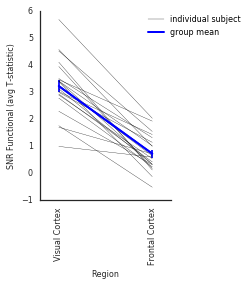

In [36]:
regions = df_all_melted.region.unique() 
regions_keep = ['IFGop_L','IFGop_R'] # can choose a subset
regions_keep = ['Frontal Cortex','Visual Cortex'] # can choose a subset
#regions_keep = df_raw_melted.region.unique() # or keep all 

index = [r in regions_keep for r in df_all_melted.region]


avgname = ''
avgname='FO'

# plot parameters 
sns.set_style('white')
params = {
   'axes.labelsize': 8,
   'axes.titlesize': 8,
    'axes.titleweight': 'normal',
    'axes.labelweight':'normal',
   'text.fontsize': 8,
   'legend.fontsize': 8,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
    'text.color':'black'
    
}

plt.rcParams.update(params)
plt.rcParams['font.sans-serif']='Helvetica'
plt.rcParams['font.family']='sans-serif'

fig,axes = plt.subplots(1,1,figsize=(2.5,4))
#fig,axes = plt.subplots(1,1,figsize=(8,4))
sns.despine()

snrtype = 'all v fix SNR'
#snrtype = 'raw SNR'

if snrtype=='raw SNR':
    subs = df_raw_melted.subject.unique()
    df_for_plot = df_raw_melted.loc[index,]
else:
    subs = df_all_melted.subject.unique()
    df_for_plot = df_all_melted.loc[index,]
    
regions = df_for_plot.region.unique()
ys = np.empty((len(subs),len(regions)))
for si,sub in enumerate(subs):
    x=0
    xs=np.array([])
    for region in regions:
            xs = np.append(xs,x)
            y = df_for_plot.loc[(df_for_plot.subject==sub)&
                        (df_for_plot.region==region),snrtype].as_matrix()
            ys[si,x] = y
            x+=1
        
    #axes.scatter(xs,ys[si,:],c='k',s=5)
    if si!=len(subs)-1:
        axes.plot(xs,ys[si,:],c='k',linewidth=0.3)
    else:
        axes.plot(xs,ys[si,:],c='k',linewidth=0.3,label='individual subject')
axes.plot(xs,np.mean(ys,axis=0),c='b',linewidth=2,label='group mean')
axes.errorbar(xs,np.mean(ys,axis=0),yerr=np.std(ys,axis=0)/np.sqrt(len(ys)),c='b')
axes.set_xticks(xs)
axes.set_xticklabels(regions,rotation=90)
axes.set_xlim([-0.2,len(regions)-0.8])

if snrtype=='raw SNR':
    axes.set_ylabel('SNR Raw')
else:
    axes.set_ylabel('SNR Functional (avg T-statistic)')

axes.set_xlabel('Region')
plt.legend(bbox_to_anchor=(.8, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
if snrtype=='raw SNR':
    plt.savefig('../Figures/Supp_SNR_Raw'+avgname+'.png',dpi=400,bbox_inches="tight")
else:
    plt.savefig('../Figures/Supp_SNR_Functional'+avgname+'.png',dpi=400,bbox_inches="tight")
plt.show()

In [35]:
df_for_plot

,subject,region,all v fix SNR


# Numerators / Denominators 

In [64]:
# make another dataframe  
df_subs_num = pd.DataFrame() # set up data frame
for s,subject in enumerate(subs):
    print(subject)
    # store name
    df_subs_num.loc[s,'subject']=subject
    
    # snr: all v fix
    for di,ds_name in enumerate(ds_set.keys()): 
        ds = ds_set[ds_name]
        name = ds_name
    
        # load 
        Sm= np.load('../data_inhouse_fmri/data_derived_for_snr/Sm_'+name+'_'+subject+'.csv.npy')
        Nm= np.load('../data_inhouse_fmri/data_derived_for_snr/Nm_'+name+'_'+subject+'.csv.npy')
        std= np.load('../data_inhouse_fmri/data_derived_for_snr/Std_'+name+'_'+subject+'.csv.npy')
        
        # add to df # 
        df_subs_num.loc[s,'Num'+name]=np.nanmean(Sm-Nm)
        df_subs_num.loc[s,'Dem'+name]=np.nanmean(std)

01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22


In [66]:
columns  = [c for c in df_subs_num.columns.values if 'Num' in c]
df_raw_melted = pd.melt(df_subs_num[['subject']+columns],id_vars=['subject'])

df_raw_melted.columns =['subject','region','numerator']
for i in range(len(df_raw_melted)):
    name = df_raw_melted.loc[i,'region']
    name = name.replace('Numds_AAL_','')
    name = name.replace('Numds_MD_','')
    df_raw_melted.loc[i,'region']=name
df_raw_melted = df_raw_melted.sort_values(by='region')


columns  = [c for c in df_subs_num.columns.values if 'Dem' in c]
df_raw_melted2 = pd.melt(df_subs_num[['subject']+columns],id_vars=['subject'])

df_raw_melted2.columns =['subject','region','denom']
for i in range(len(df_raw_melted2)):
    name = df_raw_melted2.loc[i,'region']
    name = name.replace('Demds_AAL_','')
    name = name.replace('Demds_MD_','')
    df_raw_melted2.loc[i,'region']=name
df_raw_melted2 = df_raw_melted2.sort_values(by='region')

df_raw_melted_all = df_raw_melted.merge(df_raw_melted2,on=['region','subject'])
df_raw_melted_all.head(20)


,subject,region,numerator,denom
0,04,ACC,3.021452,10.389512
1,01,ACC,1.932109,7.859031
2,02,ACC,1.841160,8.933608
3,22,ACC,3.025820,9.553349
4,21,ACC,1.154905,7.574135
5,20,ACC,3.105147,9.019081
6,19,ACC,2.090531,8.973504
7,18,ACC,1.515129,10.649769
8,17,ACC,1.965652,9.953264
9,16,ACC,1.907045,8.918790


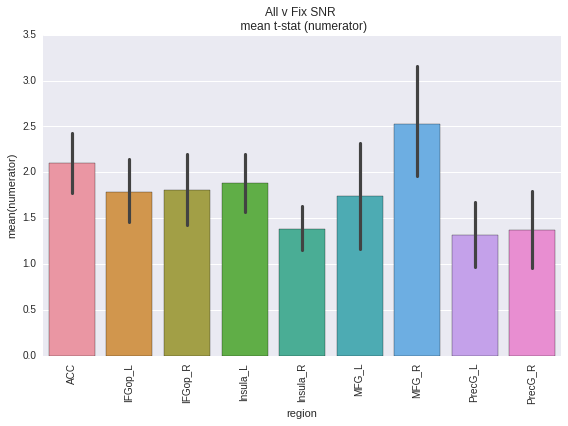

In [67]:
fig,axes = plt.subplots(1,1,figsize=(8,6))

#sns.stripplot(x='region',y='numerator',data=df_raw_melted_all,ax=axes)
sns.barplot(x='region',y='numerator',data=df_raw_melted_all,ax=axes)

#axes[0].set_title('Raw SNR')
axes.set_title('All v Fix SNR \n mean t-stat (numerator)')
#plt.savefig('../Figures/SNR_Analysis/Group_all_v_fix_SNR.png',dpi=300)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('../Figures/SNR_Analysis/Group_Bar_SNR_3_numerator.png',dpi=300)

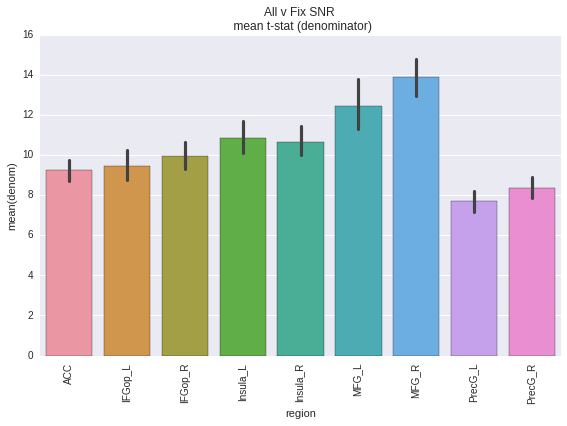

In [68]:
fig,axes = plt.subplots(1,1,figsize=(8,6))

#sns.stripplot(x='region',y='denom',jitter=True,data=df_raw_melted_all,ax=axes)
sns.barplot(x='region',y='denom',data=df_raw_melted_all,ax=axes)

#axes[0].set_title('Raw SNR')
axes.set_title('All v Fix SNR \n mean t-stat (denominator)')
#plt.savefig('../Figures/SNR_Analysis/Group_all_v_fix_SNR.png',dpi=300)

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('../Figures/SNR_Analysis/Group_Bar_SNR_3_denominator.png',dpi=300)

# Correlating with Classification Perf

In [ ]:
fig, axes = plt.subplots(2,2)

for ri,roi_number in enumerate([0,3]):
    
    average_classification = np.array([])
    all_v_fix_snr = np.array([])
    raw_snr = np.array([])
    
    for subject in subs:
        basefolder='/home/bishop/cgagne/MVPA_Analysis/data_inhouse_fmri/'
        classificationfolder = basefolder+'data_derived_classification_results/a_standard_parameter_set/'
        filee = classificationfolder+'roi'+rois[roi_number]+'subfmri_'+subject+'_TRI.txt'
        class_accuracy = np.loadtxt(filee)
        
        # collect results
        average_classification = np.append(average_classification,class_accuracy[0])
        raw_snr = np.append(raw_snr,
                            df_subs.loc[df_subs['subject']==subject,
                                        'raw_snr_'+roi_names_shorted[roi_number]].as_matrix()[0])
        all_v_fix_snr = np.append(all_v_fix_snr,
                            df_subs.loc[df_subs['subject']==subject,
                                        'all_v_fix_snr_'+roi_names_shorted[roi_number]].as_matrix()[0])
    print(roi_names_shorted[roi_number])
    (r,p)=scipy.stats.pearsonr(all_v_fix_snr,average_classification)
    print('all v fix')
    print('r='+str(r))
    print('p='+str(p))
    
    (r,p)=scipy.stats.pearsonr(raw_snr,average_classification)
    print('raw snr')
    print('r='+str(r))
    print('p='+str(p))
    #axes[ri,0].scatter(raw_snr,average_classification)
    sns.regplot(x=raw_snr,y=average_classification,ax=axes[ri,0])
    axes[ri,0].set_xlabel('raw snr')
    axes[ri,0].set_ylabel('classification accuracy')
    axes[ri,0].set_title(roi_names_shorted[roi_number])
    #axes[ri,1].scatter(all_v_fix_snr,average_classification)
    sns.regplot(x=all_v_fix_snr,y=average_classification,ax=axes[ri,1])
    axes[ri,1].set_xlabel('all v fix snr')
    axes[ri,1].set_title(roi_names_shorted[roi_number])
    axes[1,1].set_xlim([0,3])
plt.tight_layout()
plt.savefig('../Figures/SNR_Analysis/Group_Correlation_SNR_and_Accuracy.png',dpi=300)
    

In [ ]:
import scipy

# T-maps Histograms

In [ ]:

for si,subject in enumerate(subs):

    tmapf = np.load('../data_inhouse_fmri/data_derived_for_snr/t_map_frontal_'+subject+'.csv.npy')
    tmapo = np.load('../data_inhouse_fmri/data_derived_for_snr/t_map_occipital_'+subject+'.csv.npy')
    if si==0:
        tmaps_o = tmapo
        tmaps_f = tmapf
    else:
        tmaps_o = np.vstack((tmaps_o,tmapo))
        tmaps_f = np.vstack((tmaps_f,tmapf))
print(tmaps_o.shape)

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(8,6))
for si,subject in enumerate(subs):
    plt.scatter(np.ones(tmaps_o.shape[1])*si,tmaps_o[si,:],c='b')
    plt.scatter(si,np.nanmean(tmaps_o[si,:]),c='k')
    plt.scatter(np.ones(tmaps_f.shape[1])*si+0.5,tmaps_f[si,:],c='g')
    plt.scatter(si+0.5,np.nanmean(tmaps_f[si,:]),c='r')
    plt.tight_layout()
plt.xlabel('Subject')
plt.ylabel('T-statistic')
plt.axhline(y=0)
plt.title('T stat (blue=occipital; green=frontal)')
plt.savefig('../Figures/SNR_Analysis/T-distributions_bysubject.png',dpi=300)
    